In [11]:
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.problem_loaders.vrp_loader import VRPLoader
#from src.algorithms.ga_tsp import GeneticAltorithmTSP
from src.algorithms.ant_system import AntSystem
from src.algorithms.ant_vrp import AntVRP

# VRP with Ant System

Time Point: 100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


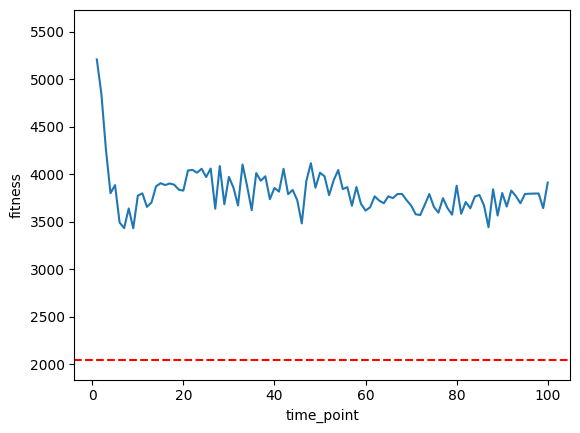

In [2]:
PROBLEM_INSTANCE_NAME = 'tai100a'

tsp_loader = VRPLoader(PROBLEM_INSTANCE_NAME)
coordinates, problem_instance, demand, capacity, best_solution, best_solution_cost = tsp_loader.load_problem_instance()
ant_system = AntSystem(AntVRP, problem_instance, demand=demand, capacity=capacity, debug_mode=False)
ant_system.run()
stats_df = ant_system.fitness_df()

chart = sns.lineplot(data=stats_df, x='time_point', y='fitness')
plt.ylim(best_solution_cost * 0.9, stats_df.fitness.max() * 1.1)
chart.axhline(best_solution_cost, color='red', linestyle='--')
plt.show()

In [10]:
ant_system.path

AttributeError: 'AntSystem' object has no attribute 'path'

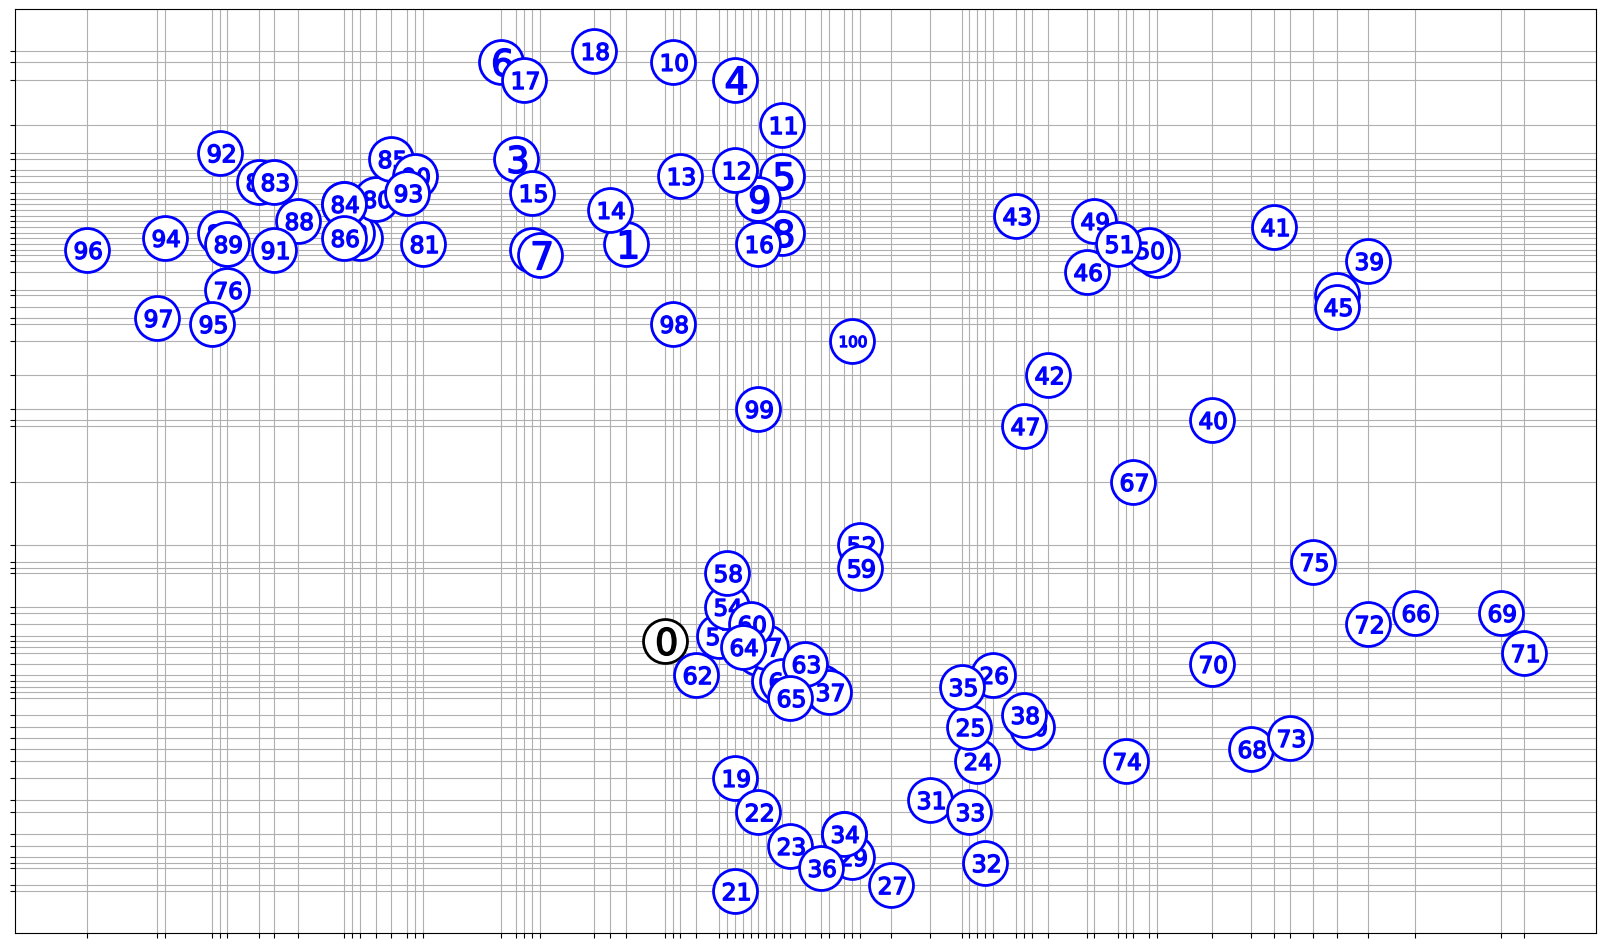

In [7]:
# https://gist.github.com/Mizux/cbc48733e0c1d8cb9171bb6828811341
def plot_location(location, axes, color, location_number):
  axes.scatter(
      location[0],
      location[1],
      s=1000,
      facecolors='white',
      edgecolors=color,
      linewidths=2)
  axes.scatter(
      location[0],
      location[1],
      s=400,
      marker=f'${location_number}$',
      edgecolors=color,
      facecolors=color)

height = 12

def plot_locations(coordinates):
    fig, axes = plt.subplots(figsize=(1.7 * height, height))
    axes.grid(True)
    axes.set_xticks(list(set([x for (x, y) in coordinates])))
    axes.set_xticklabels([])
    axes.set_yticks(list(set([y for (x, y) in coordinates])))
    axes.set_yticklabels([])
    axes.set_axisbelow(True)
    for (i, location) in enumerate(coordinates):
        color = 'blue' if i else 'black'
        plot_location(location, axes, color, i)
    return fig, axes

def plot_solution(coordinates, solution, marker_size=4):
    
    fig, axes = plot_locations(coordinates)
    google_colors = [
        r'#4285F4', r'#EA4335', r'#FBBC05', r'#34A853', r'#101010', r'#FFFFFF'
    ]
    
    for current_node_ind in range(1, len(solution)):
        start_node = solution[current_node_ind - 1]
        end_node = solution[current_node_ind]
        start = coordinates[start_node]
        end = coordinates[end_node]
        delta_x = end[0] - start[0]
        delta_y = end[1] - start[1]
        delta_length = math.sqrt(delta_x**2 + delta_y**2)
        unit_delta_x = delta_x / delta_length
        unit_delta_y = delta_y / delta_length
        axes.arrow(
            start[0] + (marker_size / 2) * unit_delta_x,
            start[1] + (marker_size / 2) * unit_delta_y,
            (delta_length - marker_size) * unit_delta_x,
            (delta_length - marker_size) * unit_delta_y,
            head_width=20,
            head_length=20,
            facecolor=google_colors[0],
            edgecolor=google_colors[0],
            length_includes_head=True,
            width=5)
        
plot_solution(coordinates, ant_system.best_path)